In [1]:
import numpy as np
from matplotlib import pyplot as plt
from HeteroscedasticGP.Models import BasicRegressor

# Make data

In [2]:
# Fixing seed for example
np.random.seed(42)

# Inputs
n = 50
X = np.linspace(0, 10, n)[:, None]  # shape (n, 1)
X_star = np.linspace(0, 10, 100)[:, None]

# True function
f_true = np.sin(X).ravel()

# Heteroscedastic noise variance
true_var = 0.5 + 0.4 * np.sin(0.5 * X)[:, 0] 
true_var_star = 0.5 + 0.4 * np.sin(0.5 * X_star)[:, 0] 

# Generate noisy outputs
y = f_true + np.sqrt(true_var) * np.random.randn(n)

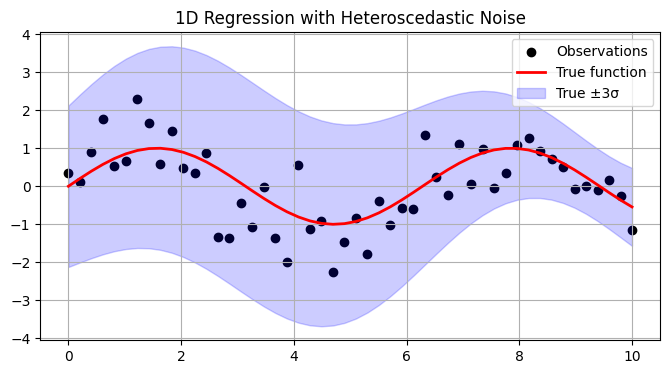

In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(X, f_true, "r", lw=2, label="True function")
plt.fill_between(
    X.ravel(),
    f_true - 3 * np.sqrt(true_var),
    f_true + 3 * np.sqrt(true_var),
    color="blue", alpha=0.2, label="True ±3σ"
)
plt.legend()
plt.title("1D Regression with Heteroscedastic Noise")
plt.grid()
plt.show()

# Fit model

In [ ]:
m = BasicRegressor(ARD=False)
z0 = np.repeat(0, len(y))
f_params0 = {'lengthscale': 1}
z_params0 = {'lengthscale': 1}
m.train(X=X, y=y, f_params0=f_params0, z_params0=z_params0, z0=z0, z0_mean=0)

In [5]:
print(m.f_params_opt)
print(m.z_params_opt)

{'lengthscale': 2.379024963753924}
{'lengthscale': 44.536771506551645}


# Predictions

In [6]:
mu_star, var_star, z_star = m.predict(X_star)

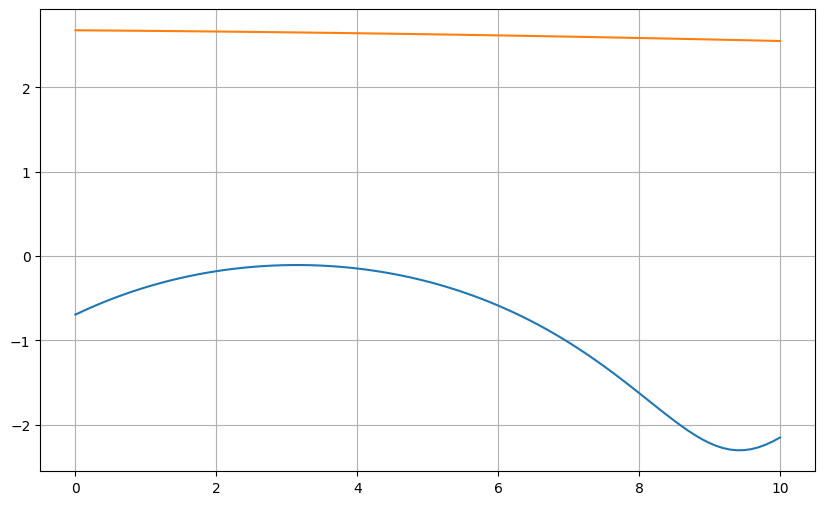

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X_star, np.log(true_var_star), label='True')
plt.plot(X_star, z_star, label='Predicted')
plt.grid()

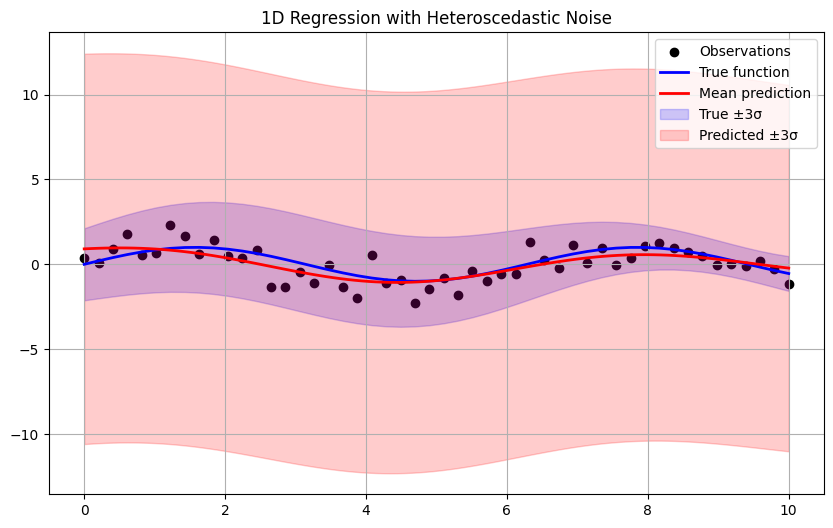

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(X, f_true, "blue", lw=2, label="True function")
plt.plot(X_star, mu_star, "red", lw=2, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    f_true - 3 * np.sqrt(true_var),
    f_true + 3 * np.sqrt(true_var),
    color="blue", alpha=0.2, label="True ±3σ"
)
plt.fill_between(
    X_star.ravel(),
    mu_star - 3 * np.sqrt(var_star),
    mu_star + 3 * np.sqrt(var_star),
    color="red", alpha=0.2, label="Predicted ±3σ"
)
plt.legend()
plt.title("1D Regression with Heteroscedastic Noise")
plt.grid()
plt.show()